Projet Numérique "Calcul différentiel"

Tanguy Aurousseau, Hugo de La Marlier

In [3]:
# Importation des librairies
import autograd
import autograd.numpy as np
import pandas as pd
import numpy.linalg


import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# Fonctions données par l'énoncé

def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

**Analyse des ensembles de niveau**
==
Question 1
=

Montrons que l'ensemble de niveau c de f,  $f^{-1}(\{c\})$ pour $c \in \mathbb{R}$, est un fermé borné.

Le singleton $\{c\}$ est un fermé. Par continuité de f de $\mathbb{R}^2$ dans $\mathbb{R}$, on en déduit que son image réciproque donc l'ensemble de niveau $f^{-1}(\{c\})$ est un fermé de $\mathbb{R}^2$.

De plus, cet ensemble est borné. En effet :  
Soit $c \in \mathbb{R}$.  
On a $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$ donc :  
$\forall A \in \mathbb{R}, \exists M \in \mathbb{R}, \|(x_1,x_2)\| \ge M \Rightarrow f(x_1,x_2)\gt A$  
En particulier, il existe $l \in \mathbb{R}$ tel que :  
$\forall (x_1,x_2) \in \mathbb{R}^2, \|(x_1,x_2)\| \ge l \Rightarrow f(x_1,x_2)\gt c$  
Alors $f^{-1}(\{c\})$ est majorée (selon la norme euclidienne) par ce réel l : l'ensemble est borné.

D'où $f^{-1}(\{c\})$ fermé et borné.

Question 2
==

Soit $x_0=(x_{10},x_{20}) \in \mathbb{R}^2$  


$p(x_1, x_2) = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}) 
= < (x_1-x_0;x_2-x_0);(\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|};-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|})> 
= <u,v>$  
Avec $u=(x_1-x_0;x_2-x_0)$ et $v=(\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|};-\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|})$  
On remarque que $v$ est obtenu après rotation du vecteur $grad(f)$ d'un angle $-\frac{\pi}{2}$.

$p(x_1,x_2)$ s'interprète géométriquement comme le produit scalaire de u et v.

Question 3
=

Soit V un voisinage ouvert de $x_0$ tel que $V\subset\mathbb{R}^2$
On pose g de $V \times \mathbb{R}$ dans $\mathbb{R}^2$ avec $g(x,t)=(f(x)-c,p(x)-t)$

Comme f est continûment différentiable, g l'est aussi par définition.

$\partial_x g(x,t) = \begin{pmatrix} \partial_1f(x) & \partial_2f(x)
\\ + \frac {\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & -\frac {\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix}$

$\Delta = - \frac{1}{\|\nabla f(x_0)\|} (\partial_1 f(x) . \partial_1 f(x_0) + \partial_2 f(x) . \partial_2 f(x_0)) \neq 0$  
Car $\nabla f$ ne s'annule pas sur V.  

Comme $\forall t \in \mathbb{R}, g(x_0,t)=(0,0)$ il existe une fonction
$\gamma$ de $]-\epsilon;\epsilon[$ dans $\mathbb{R}^2$ continûment différentiable telle que :  
$\forall x \in V$ : $f(x_1,x_2)=c$ si et seulement si $(x_1,x_2)=\gamma (t)$ où $t=p(x_1,x_2)$  
d'après le théorème des fonctions implicites.

Question 4
=

Toujours par le théorème des fonctions implicites, on a :  
$\forall t \in ]-\epsilon;\epsilon[, \gamma'(t)=-(\partial_x g(x,t))^{-1}.\partial_t f(x,t)$  

Or,  
$\partial_t f(x,t) = \begin{pmatrix} 0 \\ -1 \end{pmatrix}$

$\partial_x g(x,t))^{-1}=\frac{1}{\Delta} 
\begin{pmatrix} -\frac {\partial_1 f(x_0)}{\|\nabla f(x_0)\|} & -\partial_2f(x)
\\ -\frac {\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & \partial_1 f(x) \end{pmatrix}$  

$\gamma'(t)= -\frac{1}{\Delta} \begin{pmatrix} \partial_2f(x) \\ -\partial_1f(x) \end{pmatrix} \neq 0$  
Car $\nabla f \neq 0$ sur un voisinage ouvert de $x_0$.  

De même $< \gamma'(t),\nabla f(\gamma(t)>=\frac{1}{\Delta} (\partial_2 f(\gamma(t)) \partial_1f(\gamma(t)) - \partial_1 f(\gamma(t)) \partial_2f(\gamma(t))=0$  

D'où $\gamma'(t)$ orthogonal à $\nabla f(\gamma(t)$.

Question 5
=

In [5]:
N = 100
eps = 2.10**(-16)
#eps=eps machine : Car pour un eps plus petit, 
#Python ne détecte pas les variations donc la condition d'arrêt n'arrive jamais

Tâche 1
=

In [6]:
def Newton(F, x0, y0, eps=eps, N=N):
    J_1=numpy.linalg.inv(J(F)(x0,y0))
    for i in range(N):
        x=x0-np.dot(J_1,F(x0,y0))[0]
        y=y0-np.dot(J_1,F(x0,y0))[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

Tâche 2
=

**==> Résultats à représenter graphiquement**

In [34]:
def F1(x,y):
    return np.array([f1(x,y)-0.8,x-y])

Newton(F1,-0.5,-0.5,eps,N)

(-0.44721393148437083, -0.44721393148437083)

In [42]:
c=0.8

def F1(x,y):
    return np.array([f1(x,y)-c,x-y])

x=np.linspace(-1.0,1.0,100)
y=np.linspace(-1.0,1.0,100)
x1,y1,x2,y2,x0,y0=[],[],[],[],[],[]
for k in range(100):
    for j in range(100):
        try:
            a=Newton(F1,x[k],x[j],eps,N)
        except:
            x0.append(x[k])
            y0.append(x[j])
        if abs(Newton(F1,x[k],x[j],eps,N)[0]- Newton(F1,0.8,0.8,eps,N)[0])<0.1:
            x1.append(x[k])
            y1.append(x[j])
        elif abs(Newton(F1,x[k],x[j],eps,N)[0]- Newton(F1,-0.5,-0.5,eps,N)[0])<0.1:
            x2.append(x[k])
            y2.append(x[j])

plt.scatter(x0,y0,'Pas de convergence',color='red')
plt.scatter(x1,y1,'Convergence Point 1',color='blue')
plt.scatter(x2,y2,'Convergence Point 2',color='green')
plt.show()

<ipython-input-6-4b428721a962>:6: RuntimeWarning: overflow encountered in double_scalars
  if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
<ipython-input-4-41f422de841e>:32: RuntimeWarning: overflow encountered in double_scalars
  return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2
<ipython-input-4-41f422de841e>:32: RuntimeWarning: invalid value encountered in double_scalars
  return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2


ValueError: no convergence in 100 steps.

Question 6 + Tâche 3
==

**==> Démarche à expliquer**

array([[2.        , 1.92936632, 1.85923742, ..., 0.77650099, 0.87009989,
        0.9646227 ],
       [1.        , 0.92919493, 0.85789206, ..., 1.47409173, 1.5094168 ,
        1.54220558]])

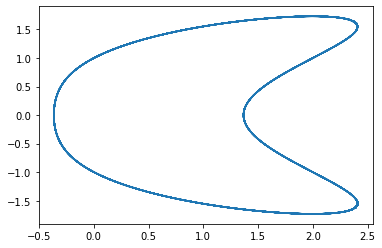

In [8]:
c=2.0

def level_curve(f, x0, y0, delta=0.1, N=1000, eps=eps):
    a, b = x0, y0
    def F(x,y):
        return np.array([f(x,y)-c,(x-a)**2+(y-b)**2-delta**2])
    tableau = np.zeros((2,N),float)
    tableau[0][0],tableau[1][0]=x0,y0
    etapes = 0
    while etapes<N-1:
        etapes+=1
        a,b=x0,y0
        #Initialisation pour une recherche "à droite"
        x1,y1=x0+(1/numpy.linalg.norm(grad(f)(x0,y0)))**(-1)*grad(f)(x0,y0)[1]*delta/10,y0-(1/numpy.linalg.norm(grad(f)(x0,y0)))**(-1)*grad(f)(x0,y0)[0]*delta/10
        x1,y1=Newton(F,x1,y1,eps,100)
        tableau[0][etapes]=x1
        tableau[1][etapes]=y1
        #Vérification du point
        p=((1/numpy.linalg.norm(grad(f)(x0,y0)))**(-1))*(grad(f)(x0,y0)[1]*(x1-x0)-grad(f)(x0,y0)[0]*(y1-y0))
        if p<=0:
            return 'error'
        x0,y0=x1,y1
    x=tableau[0]
    y=tableau[1]
    plt.plot(x,y)
    plt.show
    return tableau

level_curve(f2,2.0,1.0,0.1,1000,eps)

Question 7 + Tâche 4
==

(array([[ 2.        ,  1.92936632,  1.85923742,  1.7901095 ,  1.72251909,
          1.65710294,  1.59464653,  1.53617473,  1.48304922,  1.43707688,
          1.4005612 ,  1.37613728,  1.3661778 ,  1.37183894,  1.3924479 ,
          1.42587169,  1.46946749,  1.52080783,  1.57794758,  1.63941189,
          1.70409372,  1.77114786,  1.83990502,  1.90980865,  1.98035348,
          2.05103672,  2.12129947,  2.19042624,  2.25735888,  2.32025817,
          2.37521455,  2.41131625,  2.39430176,  2.31555144,  2.22004656,
          2.12101303,  2.02111001,  1.92110032,  1.82126841,  1.72174328,
          1.62259583,  1.52387443,  1.42562597,  1.32788516,  1.23069662,
          1.13411819,  1.03821102,  0.94304868,  0.84872616,  0.75535184,
          0.66305867,  0.57201586,  0.48243106,  0.39455555,  0.30870773,
          0.22528285,  0.14477032,  0.06776639, -0.00500226, -0.0726956 ,
         -0.13440562, -0.18923152, -0.23643153, -0.27559017, -0.30673072,
         -0.33033255, -0.3472008 , -0.

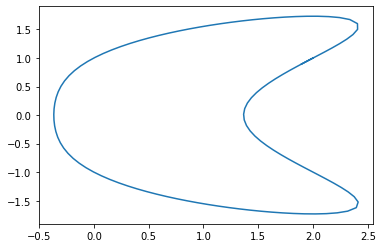

In [41]:
c=2.0

def test_inter(tableau,etapes,x,y):
    for i in range(etapes-2):
        #Points à considérer
        x0,y0=tableau[0][i],tableau[1][i]
        x1,y1=tableau[0][i+1],tableau[1][i+1]
        x2,y2=tableau[0][etapes-1],tableau[1][etapes-1]
        #Vérification du domaine d'existence du point d'intersection
        if (max(x0,x1) < min(x2,x)) or (max(y0,y1) < min(y2,y)):
            return False
        #Calcul du point d'intersection
        if x1==x0 or x==x2 :
            return False
        a1=(y1-y0)/(x1-x0)
        a2=(y-y2)/(x-x2)
        if a1==a2:
            return False #Droites parallèles
        b1=y1-a1*x1
        b2=y2-a2*x2
        xf=(b2-b1)/(a1-a2)
        yf=a1*xf+b1
        if xf<max(min(x0,x1), min(x2,x)) or xf>min(max(x0,x1), max(x2,x)):
            return False
        if yf<max(min(y0,y1), min(y2,y)) or yf>min(max(y0,y1), max(y2,y)):
            return False
        return True
        


def level_curve(f, x0, y0, delta=0.1, N=1000, eps=eps):
    a,b=x0,y0
    def F(x,y):
        return np.array([f(x,y)-c,(x-a)**2+(y-b)**2-delta**2])
    tableau=np.zeros((2,N),float)
    tableau[0][0],tableau[1][0]=x0,y0
    etapes=0
    intersection = False
    while etapes<N-1 and intersection==False :
        #Ne pas lancer test_inter si pas au moins 2 points dans le tableau
        a,b=x0,y0
        #Initialisation pour une recherche "à droite"
        x1,y1=x0+(1/numpy.linalg.norm(grad(f)(x0,y0)))**(-1)*grad(f)(x0,y0)[1]*delta/10,y0-(1/numpy.linalg.norm(grad(f)(x0,y0)))**(-1)*grad(f)(x0,y0)[0]*delta/10
        x1,y1=Newton(F,x1,y1,eps,100)
        if etapes>2:
            intersection = test_inter(tableau,etapes,x1,y1)
        etapes+=1
        tableau[0][etapes]=x1
        tableau[1][etapes]=y1
        #Vérification du point
        p=((1/numpy.linalg.norm(grad(f)(x0,y0)))**(-1))*(grad(f)(x0,y0)[1]*(x1-x0)-grad(f)(x0,y0)[0]*(y1-y0))
        if p<=0:
            return 'error'
        x0,y0=x1,y1
    x=tableau[0]
    y=tableau[1]
    plt.plot(x[:etapes],y[:etapes])
    plt.show
    return tableau[:etapes,:etapes],etapes

level_curve(f2,2.0,1.0,0.1,1000,eps)
#tableau=[[0,5,4],[0,3,1]]
#test_inter(tableau,3,1,2)

Question 8
==

Posons :  
$P_1 = (x_{P1},y_{P1})$, $P_2 = (x_{P2},y_{P2})$, $u_1 = (v_1,w_1)$ et $u_2 = (v_2,w_2)$  

$\gamma'(0)$ et $u_1$ sont dans la même direction et le même sens donc :  
$\gamma'(0) = \frac{\|\gamma'(0)\|}{\|u_1\|}.u_1$  
De même pour $\gamma'(1)$ et $u_2$:  
$\gamma'(1) = \frac{\|\gamma'(1)\|}{\|u_2\|}.u_2$  

On a :  
$\gamma(0) = P_1 = (x_{P1},y_{P1}) = (a,d)$  
$\gamma(1) = P_2 = (x_{P2},y_{P2}) = (a+b+c,d+e+f)$  
$\gamma'(0) = (b, e)$  
$\gamma'(1) = (b+2c, e+2f)$  

Donc :  

